# Random Forest - with class_weight=balanced Data from RobustScaler

## Grid search with different parameters

Various parameters and values are tested by a grid search and scored against either the 'f1', 'recall' and 'specificity' scoring metric.


### Load Packages

In [1]:
import pickle
from datetime import datetime as dt
import time
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc

### Load data

In [2]:
# import dataset from pickle
X_train, X_test, y_train, y_test = pickle.load( open( "../pickles/intercorr_app2_RobustScaler_20210711_215123.pickle", "rb" ) )

#### Convert pandas dataframe to series

In [3]:
y_train = y_train.squeeze(axis=1)
y_test = y_test.squeeze(axis=1)

### Grid search
#### Define parameter grid and scoring metric

In [4]:
grid = {'max_depth' : [int(x) for x in np.linspace(5, 10, num = 6)], 
         #'min_samples_split' : [int(x) for x in np.linspace(2, 20, num = 10)],
         #'min_samples_leaf' : [int(x) for x in np.linspace(1, 8, num = 8)],
        'min_weight_fraction_leaf' : [float(x) for x in np.linspace(0, 0.15, num = 5)],
        'min_impurity_decrease' : [float(x) for x in np.linspace(0, 0.08, num = 4)],
        'class_weight' :['balanced'],
        'criterion' : ['entropy', 'gini'],
        }

scoring = {'f1' : 'f1',
           'recall': 'recall',
           #'precision' : 'precision',
          'specificity' : make_scorer(recall_score, pos_label=0),
           }

#### Run grid search

In [5]:
grid_results = {}

In [6]:
estimators = 1000
jobs = 48
rstate = 78

start = time.time()

for sco, sc in scoring.items():
    clf_rf = RandomForestClassifier(random_state = rstate, n_estimators = estimators, n_jobs=48)
    clf_grid = GridSearchCV(clf_rf, grid, cv=StratifiedKFold(10), n_jobs=jobs, scoring=sc)
    clf_grid.fit(X_train, y_train)
    grid_results[sco] = clf_grid
    
    
    
end = time.time()

print('Calculation time: ' + time.strftime('%H:%M:%S',time.gmtime(end-start)))

Calculation time: 00:06:23


In [7]:
for k,v in grid_results.items():
    print(k + '-score: %s\n'  %grid_results[k].best_estimator_)

f1-score: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=1000, n_jobs=48,
                       random_state=78)

recall-score: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=1000, n_jobs=48,
                       random_state=78)

specificity-score: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_impurity_decrease=0.05333333333333334,
                       min_weight_fraction_leaf=0.11249999999999999,
                       n_estimators=1000, n_jobs=48, random_state=78)



Optimized for f1-score: -- Evaluation with Training Set 

Balanced Accuracy:  1.0
Accuracy :  1.0
f1-score :  1.0
Recall :  1.0
Specificity :  1.0
---------------

Optimized for f1-score: -- Confusion Matrix and External Evaluation 

Balanced Accuracy:  0.5669642857142857
Accuracy :  0.7272727272727273
f1-score :  0.8306451612903225
Recall :  0.9196428571428571
Specificity :  0.21428571428571427


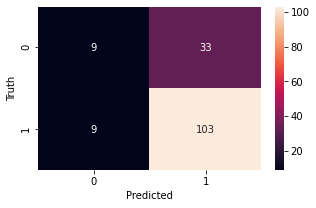




Optimized for recall-score: -- Evaluation with Training Set 

Balanced Accuracy:  1.0
Accuracy :  1.0
f1-score :  1.0
Recall :  1.0
Specificity :  1.0
---------------

Optimized for recall-score: -- Confusion Matrix and External Evaluation 

Balanced Accuracy:  0.5669642857142857
Accuracy :  0.7272727272727273
f1-score :  0.8306451612903225
Recall :  0.9196428571428571
Specificity :  0.21428571428571427


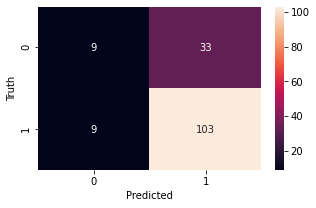




Optimized for specificity-score: -- Evaluation with Training Set 

Balanced Accuracy:  0.6804630246502332
Accuracy :  0.6758957654723127
f1-score :  0.75462392108508
Recall :  0.6710526315789473
Specificity :  0.689873417721519
---------------

Optimized for specificity-score: -- Confusion Matrix and External Evaluation 

Balanced Accuracy:  0.6473214285714286
Accuracy :  0.6493506493506493
f1-score :  0.73
Recall :  0.6517857142857143
Specificity :  0.6428571428571429


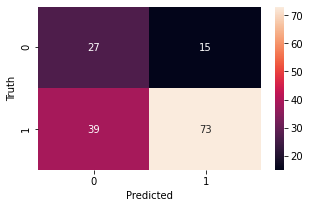

In [8]:
for k,v in grid_results.items():

    print('============================================================================')
    print('Optimized for %s-score: -- Evaluation with Training Set \n' %(k))
    y_predicted = grid_results[k].predict(X_train)
    print('Balanced Accuracy: ', balanced_accuracy_score(y_train, y_predicted))
    print('Accuracy : ', accuracy_score(y_train, y_predicted))
    print('f1-score : ', f1_score(y_train, y_predicted))
    print('Recall : ' , recall_score(y_train, y_predicted))

    print('Specificity : ', recall_score(y_train, y_predicted, pos_label=0) )
    print('---------------\n')

    print('Optimized for %s-score: -- Confusion Matrix and External Evaluation \n' %(k))
    y_predicted = grid_results[k].predict(X_test)
    cm1 = confusion_matrix(y_test, y_predicted)
    
    print('Balanced Accuracy: ', balanced_accuracy_score(y_test, y_predicted))
    print('Accuracy : ', accuracy_score(y_test, y_predicted))
    print('f1-score : ', f1_score(y_test, y_predicted))
    print('Recall : ' , recall_score(y_test, y_predicted))


    print('Specificity : ', recall_score(y_test, y_predicted, pos_label=0) )

    # Visualize it as a heatmap
    import matplotlib.pyplot as plt
    import seaborn as sn
    plt.figure(figsize=(5,3))
    sn.heatmap(cm1,annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    print('\n\n')

### Save Results

In [9]:
out = (grid_results)
timestamp = dt.now().strftime("%Y%m%d_%H%M%S")
filename = 'RF_Robust_balanced_%s.pickle' %timestamp
filehandler = open(filename, 'wb')
pickle.dump(out, filehandler)